In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

#NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
df = pd.read_csv('/content/drive/My Drive/dataset/train.csv', encoding='ISO-8859-1')
print(df.head(10))
print(df.tail(10))

                                     Patient_comment    Patient_Category
0                    When I remember her I feel down      Emotional pain
1  When I carry heavy things I feel like breaking...    Hair falling out
2          there is too much pain when i move my arm         Heart hurts
3  My son had his lip pierced and it is swollen a...      Infected wound
4             My muscles in my lower back are aching      Infected wound
5  i have muscle pain that my back\nI Have Muscle...           Foot ache
6                  I have muscle pain in my left leg       Shoulder pain
7  I have cut my finger because of playing footba...  Injury from sports
8  I have acne in my face and other problems in m...          Skin issue
9                    I have a strange rash on my arm           Foot ache
                                        Patient_comment  Patient_Category
6651      My chest acne breaks out and never clears up.              Acne
6652    I feel depressed when I see my hair falli

In [7]:
df.head(10)

,Patient_comment,Patient_Category
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound
5,i have muscle pain that my back\nI Have Muscle...,Foot ache
6,I have muscle pain in my left leg,Shoulder pain
7,I have cut my finger because of playing footba...,Injury from sports
8,I have acne in my face and other problems in m...,Skin issue
9,I have a strange rash on my arm,Foot ache


In [8]:
df.tail(10)

,Patient_comment,Patient_Category
6651,My chest acne breaks out and never clears up.,Acne
6652,I feel depressed when I see my hair falling out,Hair falling out
6653,I have shoulder pain when I try to carry my gr...,Shoulder pain
6654,I have a cut that has become red and oozes puss.,Infected wound
6655,I have a ear ache when I go to the pool,Ear ache
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache
6657,I have a split on my thumb that will not heal.,Open wound
6658,I feel a lot of pain in the joints.,Joint pain
6659,The area around my heart doesn't feel good.,Heart hurts
6660,I complain alot with skin allergy,Skin issue


No charts were generated by quickchart


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_comment   6661 non-null   object
 1   Patient_Category  6661 non-null   object
dtypes: object(2)
memory usage: 104.2+ KB


In [13]:
distinct_entries = df['Patient_Category'].unique()
print(distinct_entries)

['Emotional pain' 'Hair falling out' 'Heart hurts' 'Infected wound'
 'Foot ache' 'Shoulder pain' 'Injury from sports' 'Skin issue'
 'Stomach ache' 'Knee pain' 'Joint pain' 'Hard to breath' 'Head ache'
 'Body feels weak' 'Feeling dizzy' 'Back pain' 'Open wound'
 'Internal pain' 'Blurry vision' 'Acne' 'Muscle pain' 'Neck pain' 'Cough'
 'Ear ache' 'Feeling cold']


In [14]:
distinct_count = len(df['Patient_Category'].unique())
print(distinct_count)

25


In [16]:
total_nulls = df.isnull().sum().sum()
total_nulls

0

In [17]:
df.dropna()

,Patient_comment,Patient_Category
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound
...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache
6657,I have a split on my thumb that will not heal.,Open wound
6658,I feel a lot of pain in the joints.,Joint pain
6659,The area around my heart doesn't feel good.,Heart hurts


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_comment   6661 non-null   object
 1   Patient_Category  6661 non-null   object
dtypes: object(2)
memory usage: 104.2+ KB


In [20]:
# Create the mapping of symptoms to doctors
doctor_types = {
    'Emotional pain': 'Psychiatrist',
    'Hair falling out': 'Dermatologist',
    'Heart hurts': 'Cardiologist',
    'Infected wound': 'Surgeon',
    'Foot ache': 'Rheumatologist',
    'Shoulder pain': 'Rheumatologist/Gastro-enterologist',
    'Injury from sports': 'Rheumatologist',
    'Skin issue': 'Dermatologist',
    'Stomach ache': 'Gastro-enterologist',
    'Knee pain': 'Orthopedist',
    'Joint pain': 'Orthopedist',
    'Hard to breath': 'Respirologist',
    'Head ache': 'Neurologist/Gastro-enterologist',
    'Body feels weak': 'General Physicians',
    'Feeling dizzy': 'General Physicians',
    'Back pain': 'Orthopedist',
    'Open wound': 'Surgeon',
    'Internal pain': 'Gastro-enterologist',
    'Blurry vision': 'Ophthalmologist',
    'Acne': 'Dermatologist',
    'Muscle pain': 'Rheumatologist',
    'Neck pain': 'Rheumatologist/Orthopedist',
    'Cough': 'ENT Specialist',
    'Ear ache': 'ENT Specialist',
    'Feeling cold': 'ENT Specialist'
}

df['Doctor_Type'] = df['Patient_Category'].map(doctor_types)

print(df.head())


                                     Patient_comment  Patient_Category  \
0                    When I remember her I feel down    Emotional pain   
1  When I carry heavy things I feel like breaking...  Hair falling out   
2          there is too much pain when i move my arm       Heart hurts   
3  My son had his lip pierced and it is swollen a...    Infected wound   
4             My muscles in my lower back are aching    Infected wound   

     Doctor_Type  
0   Psychiatrist  
1  Dermatologist  
2   Cardiologist  
3        Surgeon  
4        Surgeon  


In [21]:
df.head(10)

,Patient_comment,Patient_Category,Doctor_Type
0,When I remember her I feel down,Emotional pain,Psychiatrist
1,When I carry heavy things I feel like breaking...,Hair falling out,Dermatologist
2,there is too much pain when i move my arm,Heart hurts,Cardiologist
3,My son had his lip pierced and it is swollen a...,Infected wound,Surgeon
4,My muscles in my lower back are aching,Infected wound,Surgeon
5,i have muscle pain that my back\nI Have Muscle...,Foot ache,Rheumatologist
6,I have muscle pain in my left leg,Shoulder pain,Rheumatologist/Gastro-enterologist
7,I have cut my finger because of playing footba...,Injury from sports,Rheumatologist
8,I have acne in my face and other problems in m...,Skin issue,Dermatologist
9,I have a strange rash on my arm,Foot ache,Rheumatologist


# Lowercasing

In [24]:
df['Patient_comment'] = df['Patient_comment'].str.lower()

# Removing Punctuation

In [25]:
df['Patient_comment'] = df['Patient_comment'].str.replace('[^\w\s]', '', regex=True)

# Stop Word

In [27]:
nltk.download('stopwords')
stop = stopwords.words('english')
df['Patient_comment'] = df['Patient_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
df.head(12)

,Patient_comment,Patient_Category,Doctor_Type
0,remember feel,Emotional pain,Psychiatrist
1,carry heavy things feel like breaking back,Hair falling out,Dermatologist
2,much pain move arm,Heart hurts,Cardiologist
3,son lip pierced swollen skin inside lip grey l...,Infected wound,Surgeon
4,muscles lower back aching,Infected wound,Surgeon
5,muscle pain back muscle pain back leg,Foot ache,Rheumatologist
6,muscle pain left leg,Shoulder pain,Rheumatologist/Gastro-enterologist
7,cut finger playing football apply pain relief ...,Injury from sports,Rheumatologist
8,acne face problems derma like itching,Skin issue,Dermatologist
9,strange rash arm,Foot ache,Rheumatologist


In [31]:
ps = PorterStemmer()
df['Patient_comment'] = df['Patient_comment'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,Patient_comment,Patient_Category,Doctor_Type
0,rememb feel,Emotional pain,Psychiatrist
1,carri heavi thing feel like break back,Hair falling out,Dermatologist
2,much pain move arm,Heart hurts,Cardiologist
3,son lip pierc swollen skin insid lip grey look...,Infected wound,Surgeon
4,muscl lower back ach,Infected wound,Surgeon


In [32]:
df.to_csv('/content/drive/My Drive/dataset/updated.csv', index=False)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_comment   6661 non-null   object
 1   Patient_Category  6661 non-null   object
 2   Doctor_Type       6661 non-null   object
dtypes: object(3)
memory usage: 156.2+ KB


# **Exploratory Data Analysis**

In [44]:
fig_patient = px.histogram(df,
                            y='Patient_Category',
                            title='Distribution of Patient Categories',
                            color='Patient_Category',
                            text_auto=True,
                            category_orders={'Patient_Category': df['Patient_Category'].value_counts().index.tolist()},
                            height=800)
fig_patient.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_patient.show()

In [40]:
# Interactive count plot for Doctor_Type
fig_doctor = px.histogram(df,
                          y='Doctor_Type',
                          title='Distribution of Doctor Types',
                          color='Doctor_Type',
                          text_auto=True,
                          category_orders={'Doctor_Type': df['Doctor_Type'].value_counts().index.tolist()},
                          height=600)
fig_doctor.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_doctor.show()

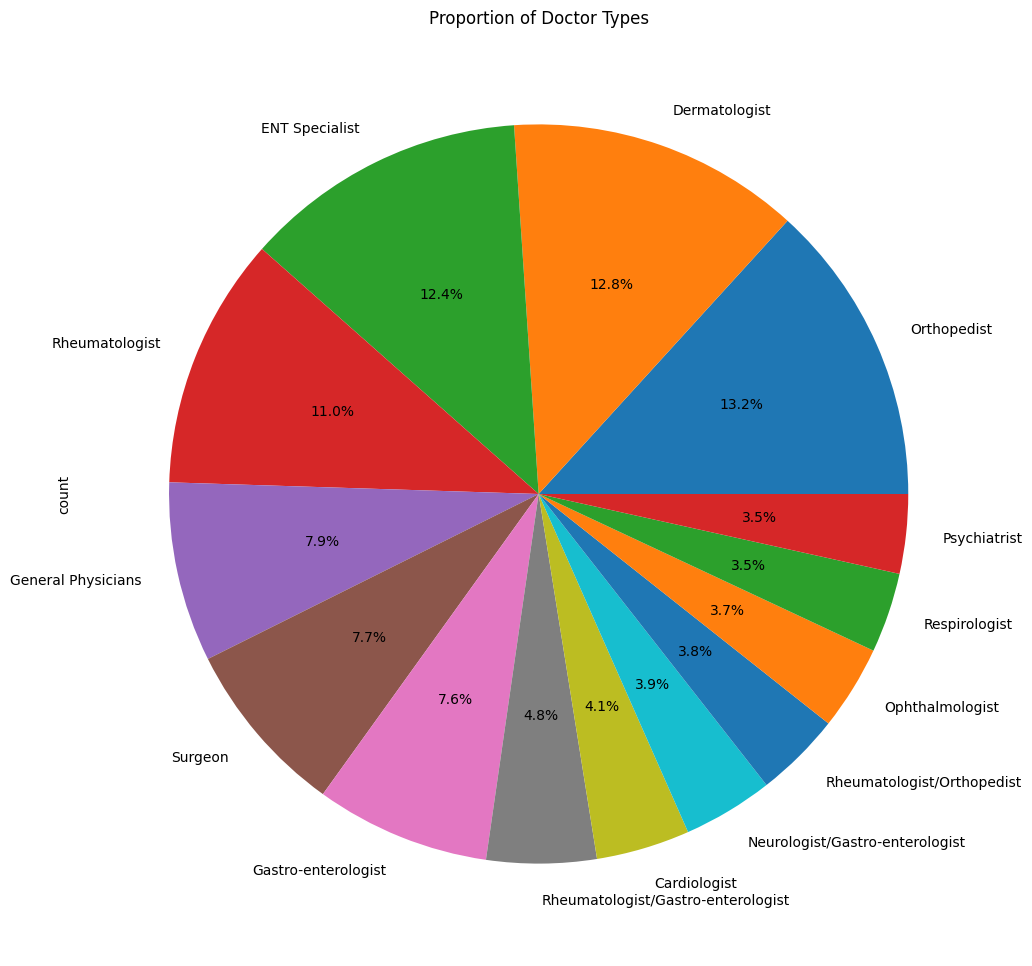

<Figure size 640x480 with 0 Axes>

In [52]:
# df['Doctor_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(12, 12), dpi= 150)
# plt.title('Proportion of Doctor Types')
# plt.show()

df['Doctor_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(12, 12))

plt.title('Proportion of Doctor Types')

# Show the plot
plt.show()

# Save the plot with specific DPI
plt.savefig('doctor_types_pie_chart.png', dpi=250)

# Wordcloud

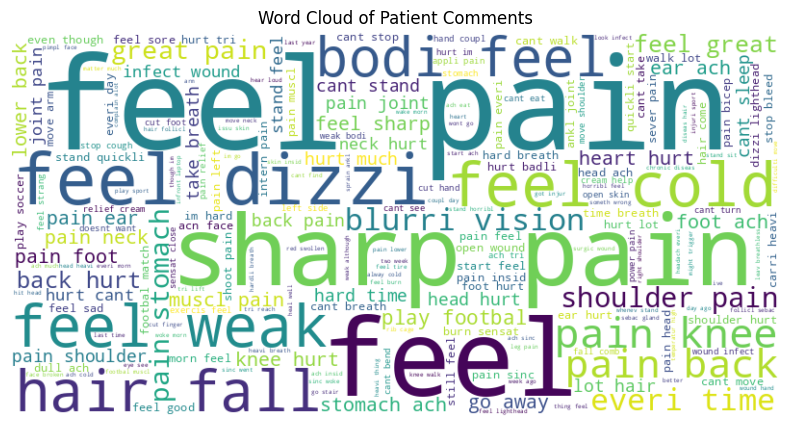

In [54]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Patient_comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Patient Comments')
plt.show()

In [62]:
df.head()


,Patient_comment,Patient_Category,Doctor_Type
0,rememb feel,Emotional pain,Psychiatrist
1,carri heavi thing feel like break back,Hair falling out,Dermatologist
2,much pain move arm,Heart hurts,Cardiologist
3,son lip pierc swollen skin insid lip grey look...,Infected wound,Surgeon
4,muscl lower back ach,Infected wound,Surgeon


# Heatmap

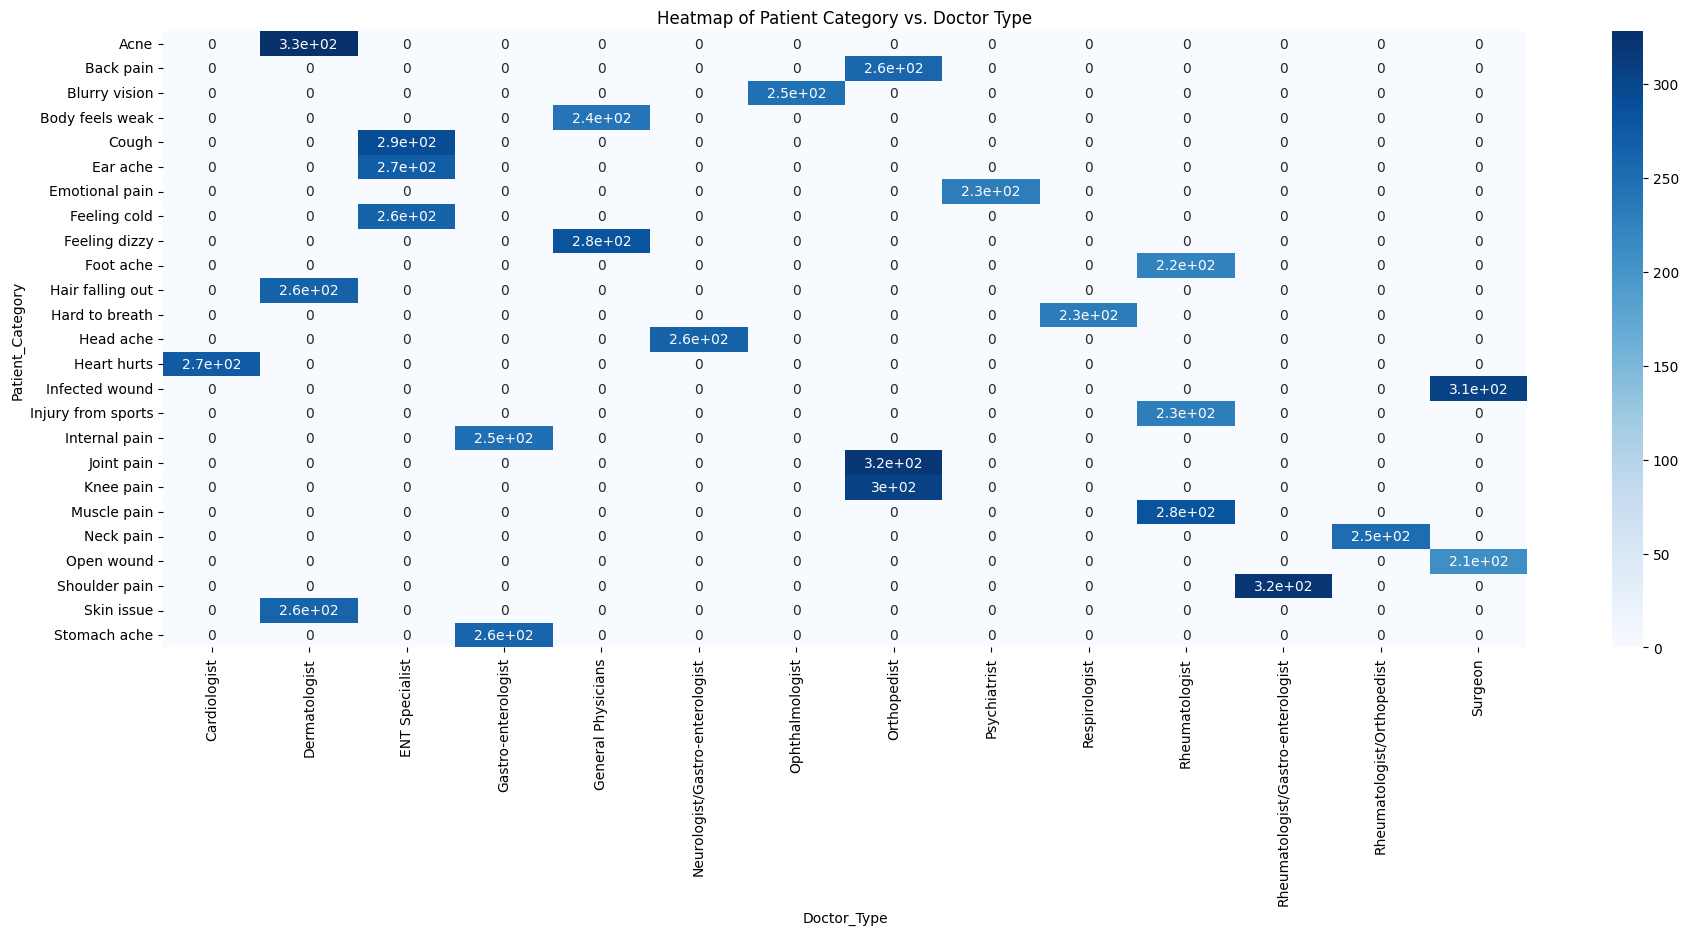

In [72]:
plt.figure(figsize=(22, 8))
sns.heatmap(pd.crosstab(df['Patient_Category'], df['Doctor_Type']), annot=True, cmap='Blues')
plt.title('Heatmap of Patient Category vs. Doctor Type')
plt.show()

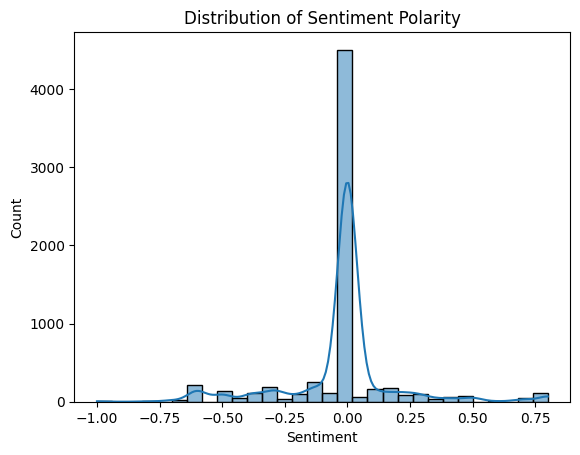

In [79]:
from textblob import TextBlob
df['Sentiment'] = df['Patient_comment'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.show()

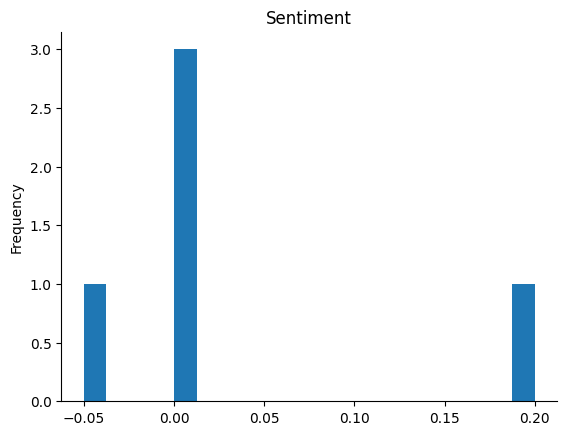

In [82]:
from matplotlib import pyplot as plt
_df_0['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)